In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

def show_bband(df, n=20, k=2):
    '''
    불린저 밴드
    N기간 동안의 이동평균(MA)
    이동편균 위의 K배 표준편차 상위 밴드
    이동편균 아래의 K배 표준편차 하위 밴드
    일반적으로 N과 K의 값은 20과 2
    '''
    
    # 그래프 스타일
    plt.style.use('seaborn-whitegrid')
    # 20일간의 종가 이동평균
    df['MA20'] = df['Close'].rolling(20).mean()
    # 20일간 종가의 표준편차
    df['stddev'] = df['Close'].rolling(20).std()
    # 종가 이동평균 + (표준편차 * 2)
    df['UpperB'] = df['MA20'] + (df['stddev'] * 2)
    # 종가 이동평균 - (표준편차 * 2)
    df['LowerB'] = df['MA20'] - (df['stddev'] * 2)
    # window siez로 18번 인덱스까지 (0-18) Nan이기 때문에
    # 19번 인덱스부터 사용
    df = df[19:].copy()
    
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df.UpperB, 'r--', label='UpperB')
    plt.plot(df.index, df.Close, 'k', label='Close')
    plt.plot(df.index, df.MA20, label='MA20')
    plt.plot(df.index, df.LowerB, 'b--', label='LowerB')
    plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)
    plt.legend(loc='best')
    plt.title('Bollinger Bands')

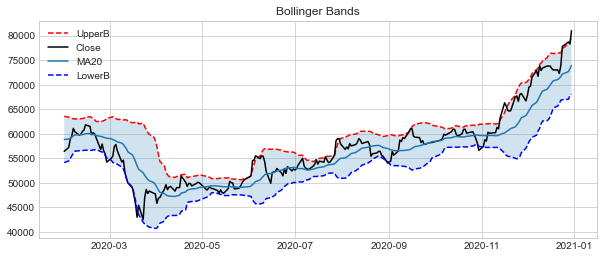

In [8]:
df = fdr.DataReader('005930', '2020', '2021')
show_bband(df)

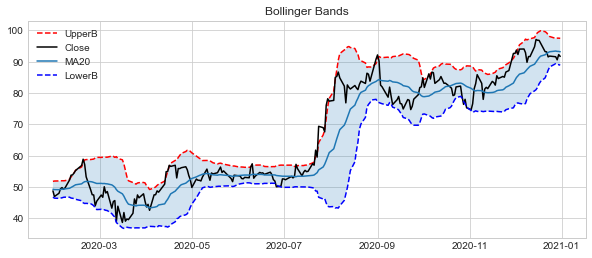

In [9]:
# FinanceDataReader.DataReader 사용 시 미국주식의 경우 티커사용
amd = fdr.DataReader('AMD', '2020', '2021')
show_bband(amd)

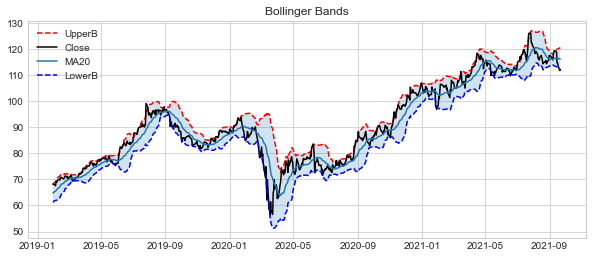

In [10]:
stx = fdr.DataReader('SBUX', '2019')
show_bband(stx)